### import

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('1.03. Dummies.csv')
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
data=raw_data.copy()
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


### Regression

In [4]:
y=data['GPA']
x1=data[['SAT','Attendance']]

In [5]:
x=sn.add_constant(x1)
result=sn.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           2.19e-15
Time:                        13:32:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

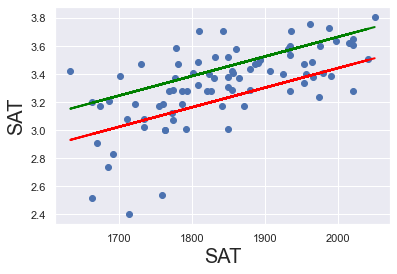

In [6]:
plt.scatter(data['SAT'],y)
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
fig=plt.plot(data['SAT'],yhat_no,lw=2,c='red')
fig=plt.plot(data['SAT'],yhat_yes,lw=2,c='green')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('SAT',fontsize=20)
plt.show()

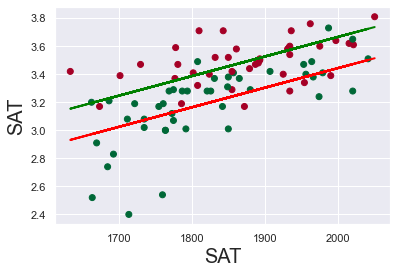

In [7]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
fig=plt.plot(data['SAT'],yhat_no,lw=2,c='red',label='regression_line1')
fig=plt.plot(data['SAT'],yhat_yes,lw=2,c='green',label='regression_line2')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('SAT',fontsize=20)
plt.show()

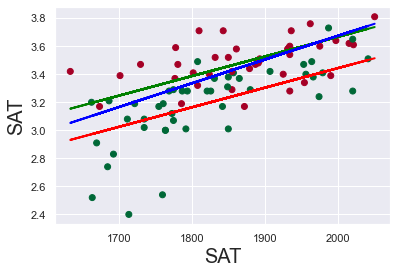

In [8]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no=0.6439+0.0014*data['SAT']
yhat_yes=0.8665+0.0014*data['SAT']
yhat=0.0017*data['SAT']+0.275
fig=plt.plot(data['SAT'],yhat_no,lw=2,c='red',label='regression_line1')
fig=plt.plot(data['SAT'],yhat_yes,lw=2,c='green',label='regression_line2')
fig=plt.plot(data['SAT'],yhat,lw=2,c='blue',label='regression_line2')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('SAT',fontsize=20)
plt.show()

### Prediction

In [9]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [10]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendence':[0,1]})
new_data=new_data[['const','SAT','Attendence']]
new_data

,const,SAT,Attendence
0,1,1700,0
1,1,1670,1


In [11]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendence
Bob,1,1700,0
Alice,1,1670,1


In [12]:
predictions=result.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [13]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsdf)
joined

,const,SAT,Attendence,Predictions
0,1,1700,0,3.023513
1,1,1670,1,3.204163
